Etape 1: Prétraitement

In [1]:
#Importation des librairies
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost
import re #Regular expressions
import nltk
import pandas as pd

In [2]:
#Charger les données d'entraînement et les données de validation
val=pd.read_csv("twitter_validation.csv", header=None)
train=pd.read_csv("twitter_training.csv", header=None)
#Afficher les données pour verification
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [4]:
train_data=train
train_data
val_data=val
val_data

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [5]:
#Nettoyage des données
train_data["lower"]=train_data.text.str.lower() #minsuscules
train_data["lower"]=[str(data) for data in train_data.lower]
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) 
val_data["lower"]=val_data.text.str.lower() 
val_data["lower"]=[str(data) for data in val_data.lower]
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

In [6]:
#Verification des modif
train_data.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


Analyse des données

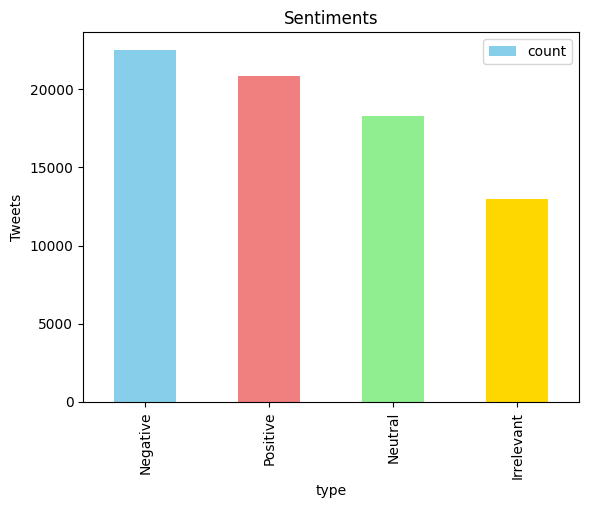

In [7]:
# Compter les occurrences de chaque type
compte_types = train_data['type'].value_counts()
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'purple']

# Afficher le graphe
compte_types.plot(kind='bar', color=colors)
plt.title('Sentiments')
plt.ylabel('Tweets')
plt.legend()
plt.show()

In [8]:
#Regrouper les données d'entraînement par "information" (marque) et "type" (sentiment)
plot1=train_data.groupby(by=["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


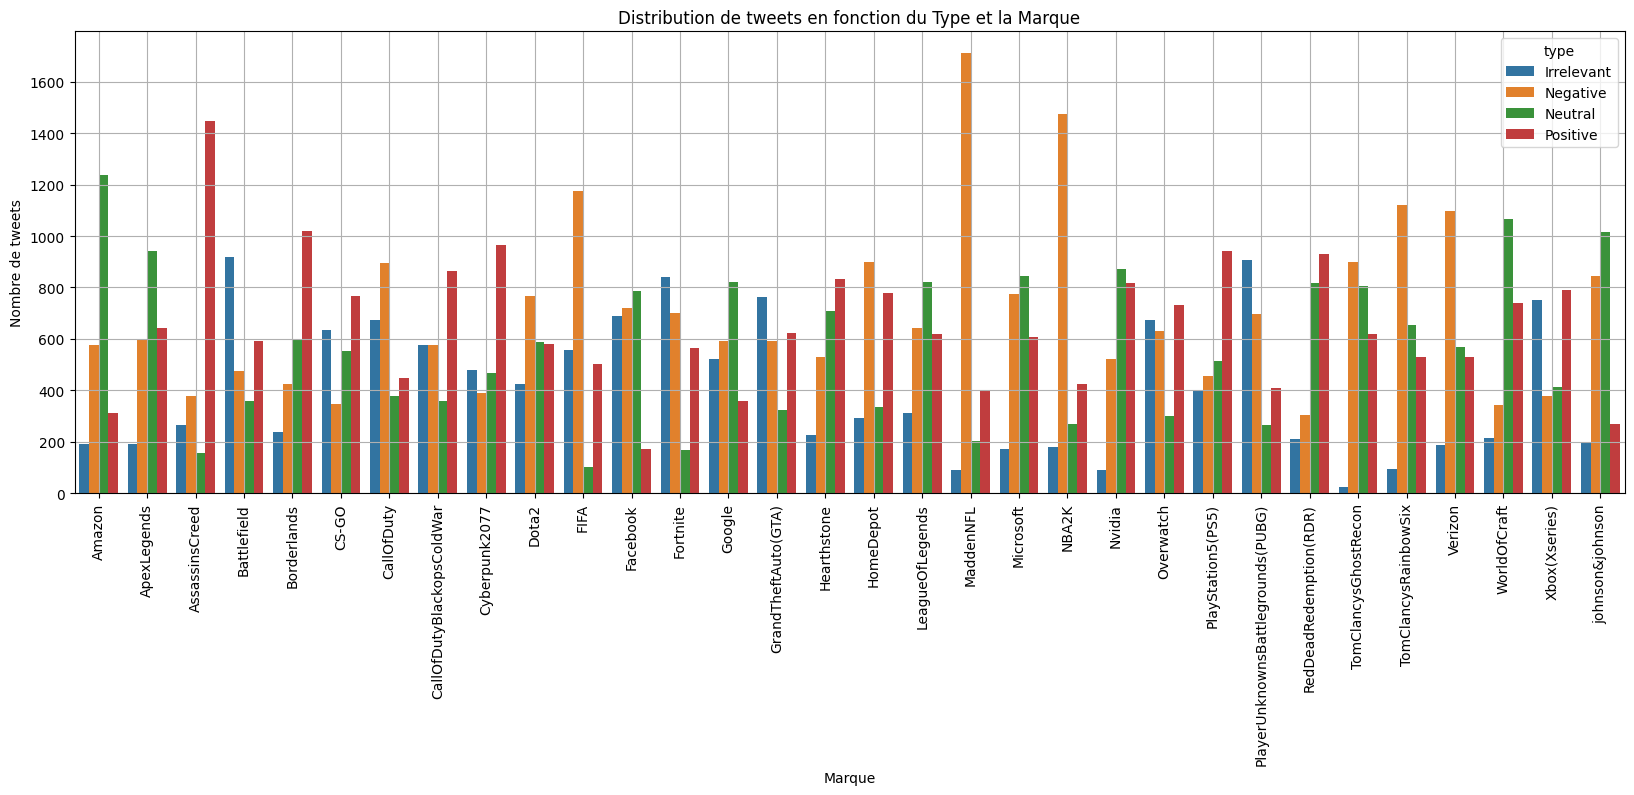

In [9]:
#Créer une figure représentant les occurrences des sentiments pour chaque marque
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Marque")
plt.ylabel("Nombre de tweets")
plt.grid()
plt.title("Distribution de tweets en fonction du Type et la Marque");

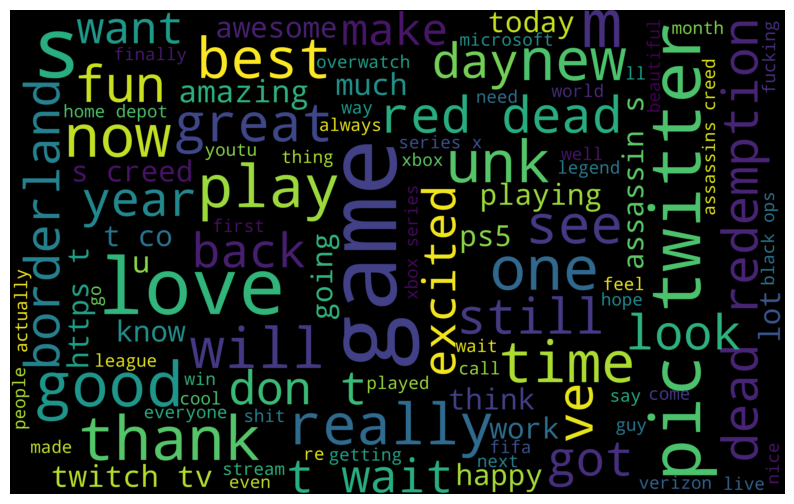

In [12]:
#Les top words pour le sentiment positif
word_cloud_text = ''.join(train_data[train_data["type"]=="Positive"].lower)
#Creation du wordcloud
from wordcloud import WordCloud 
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=500
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

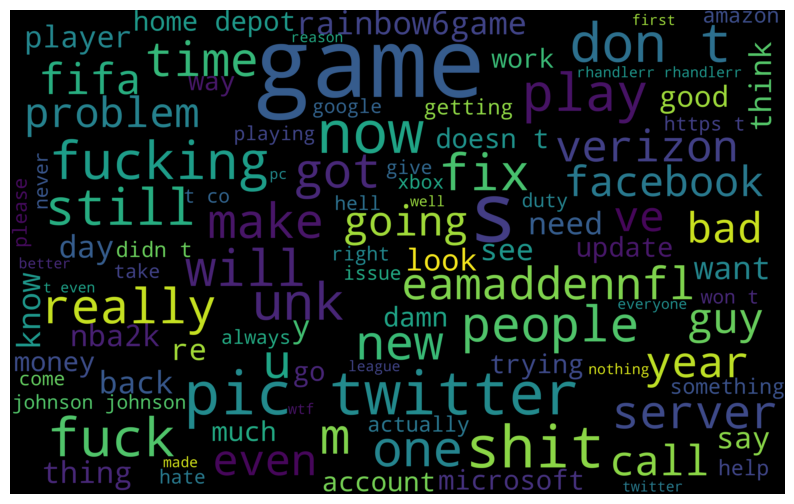

In [13]:
#Les top words pour le sentiment négatif
word_cloud_text = ''.join(train_data[train_data["type"]=="Negative"].lower)
#Creation du wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=500
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

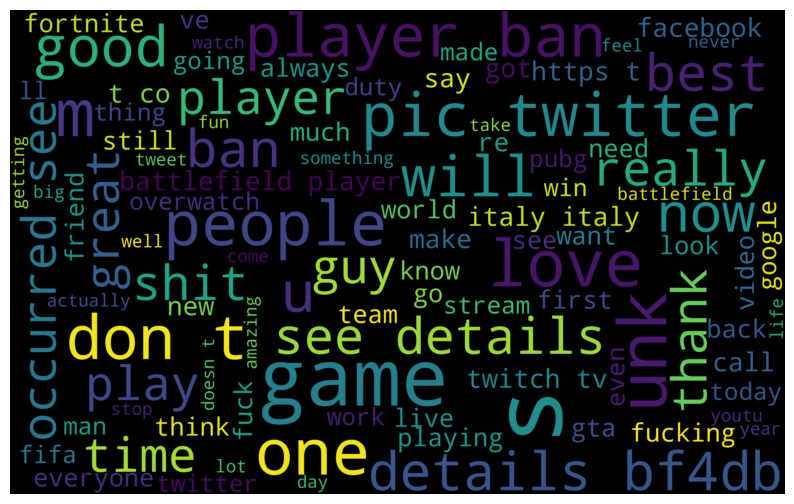

In [14]:
#Les top words pour le sentiment irrelevant
word_cloud_text = ''.join(train_data[train_data["type"]=="Irrelevant"].lower)
#Creation du wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=500
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

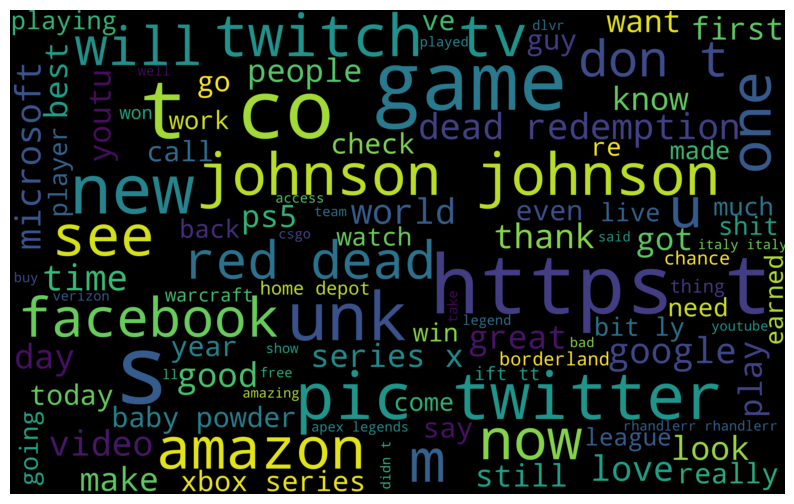

In [15]:
#Les top words pour le sentiment Neutral
word_cloud_text = ''.join(train_data[train_data["type"]=="Neutral"].lower)
#Creation du wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=500
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
#Compter les tokens uniques et afficher une entrée
from nltk.tokenize import word_tokenize
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))
tokens_text[1]

Number of tokens:  30436


['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [17]:
#Exemple de stop words en anglais
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [18]:
#Utilisation de CountVectorizer (transformer les mots en matrice)
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, 
    ngram_range=(1, 1) #unigrammes
)

In [19]:
#Diviser les données d'entraînement en deux ensembles
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [20]:
# Création de l'encodage pour le jeu de données d'entraînement
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
# Transformation du jeu de données de test avec l'encodage d'entraînement
X_test_bow = bow_counts.transform(reviews_test.lower)


C:\Users\asmac\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\asmac\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [21]:
X_test_bow

<14937x28993 sparse matrix of type '<class 'numpy.int64'>'
	with 161222 stored elements in Compressed Sparse Row format>

In [22]:
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [23]:
#Calculer la distribution de chaque catégorie dans le jeu d'entrainement
y_test_bow.value_counts() / y_test_bow.shape[0]

type
Negative      0.299190
Positive      0.282252
Neutral       0.245632
Irrelevant    0.172926
Name: count, dtype: float64

Modélisation avec LogisticRegression

In [24]:
#MODELE 1
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Précision sur le jeu de test")
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['type']
X_val_bow
Val_res = model1.predict(X_val_bow)
print("Précision sur le jeu de validation")
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Etiquetage des données
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(val_data.lower)
X_train_bow

C:\Users\asmac\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\asmac\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Précision sur le jeu de test
Accuracy:  81.50900448550578
Précision sur le jeu de validation
Accuracy:  91.7


<59745x1427378 sparse matrix of type '<class 'numpy.int64'>'
	with 4142213 stored elements in Compressed Sparse Row format>

In [25]:
#MODELE 2
model2 = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Précision sur le jeu de test")
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)
y_val_bow = val_data['type']
Val_pred_2 = model2.predict(X_val_bow)
print("Précision sur le jeu de validation")
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

Précision sur le jeu de test
Accuracy:  90.78797616656624
Précision sur le jeu de validation
Accuracy:  98.6
